<a href="https://colab.research.google.com/github/Nzaya/Bank-Account-Prediction/blob/master/%22Moringa_Data_Science_Core_W2_Independent_Project_2019_06_Sharon_Nzaya_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **LOADING PACKAGES**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib as mpl
import matplotlib.pylab as pylab
#from pandas.tools.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
print('-'*25)
import random
import time



-------------------------


**LOADING OUR DATASET**

In [0]:
financial=pd.read_csv("/content/Financial Dataset - 1.csv")
financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,Rural,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,0.0,5.0,70.0,Female,Head of Household,Widowed,0 formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,Urban,1.0,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,Rural,1.0,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,Urban,0.0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**DATA CLEANING**: Correcting, Completing, Creating, and Converting

In [0]:
#identifying null values

print('Financial columns with null values:\n', financial.isnull().sum())
print("-"*10)

Financial columns with null values:
 country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64
----------


In [0]:
#Describing our dataset

financial.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


**CLEAN DATA**

In [0]:
#complete missing age with median
financial['Respondent Age'].fillna(financial['Respondent Age'].median(), inplace = True)

In [0]:
#completing missing values in Household size with mode
financial['household_size'].fillna(financial['household_size'].mode()[0], inplace = True)


In [0]:
#Dropping columns uniqueid
drop_column = ['uniqueid']
financial.drop(drop_column, axis=1, inplace = True)


In [0]:
#Preview dataset
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
#Drop all rows with missing values
financial.dropna(inplace=True)

In [0]:
#Rechecking our dataset after dropping all missing values
financial.isnull().any()

country                   False
year                      False
uniqueid                  False
Has a Bank account        False
Type of Location          False
Cell Phone Access         False
household_size            False
Respondent Age            False
gender_of_respondent      False
The relathip with head    False
marital_status            False
Level of Educuation       False
Type of Job               False
dtype: bool

In [0]:
#The number of rows and columns
financial.shape

(23343, 13)

**Perform Exploratory Analysis with Statistics**

UNIVERIATE ANALYSIS

In [0]:
financial.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.979000,0.899669,2016.0,2016.0,2017.0,2018.0,2056.0
Has a Bank account,23488.0,0.140880,0.347906,0.0,0.0,0.0,0.0,1.0
Cell Phone Access,23513.0,0.742100,0.437488,0.0,0.0,1.0,1.0,1.0
household_size,23496.0,3.681818,2.279933,0.0,2.0,3.0,5.0,21.0
Respondent Age,23490.0,38.804300,16.519996,16.0,26.0,35.0,49.0,100.0


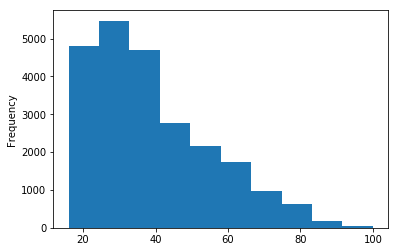

In [0]:
financial['Respondent Age'].plot(kind="hist")

In [0]:
#Finding standard deviation in our dataset
financial.std()

year                   0.899669
Has a Bank account     0.347906
Cell Phone Access      0.437488
household_size         2.279933
Respondent Age        16.519996
dtype: float64

In [0]:
#Finding skewness in our dataset  
financial.skew()

year                  4.222798
Has a Bank account    2.064641
Cell Phone Access    -1.106868
household_size        0.977652
Respondent Age        0.841801
dtype: float64

In [0]:
#Finding range in household_size
maxhousehold = financial.household_size.max()
minhousehold = financial.household_size.min()
range = maxhousehold - minhousehold
range

21.0

In [0]:
#Finding kurtosis in our dataset
financial.kurt()

year                  165.195071
Has a Bank account      2.262936
Cell Phone Access      -0.774909
household_size          1.158154
Respondent Age          0.101108
dtype: float64

In [0]:
#creating a frequency table

financial.country.value_counts()

Rwanda      8735
Tanzania    6606
Kenya       6068
Uganda      2101
Name: country, dtype: int64

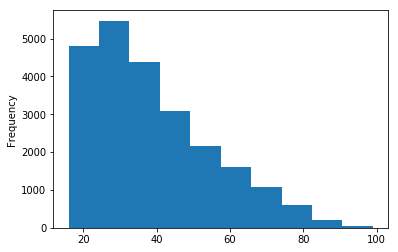

In [0]:
financial[financial['Respondent Age'] < 100]['Respondent Age'].plot.hist()

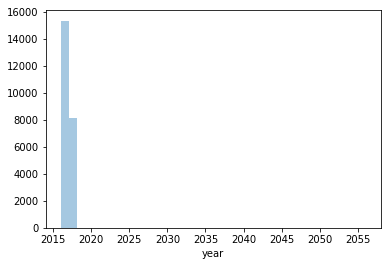

In [0]:
sns.distplot(financial.year.dropna(), kde=False, bins = 39);

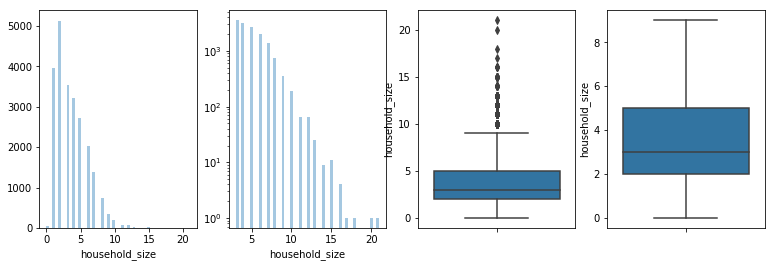

In [0]:
household_sizefig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(financial.household_size.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(financial.household_size.dropna()[financial.household_size > 2], kde=False, ax=axs[1])
sns.boxplot(financial.household_size, ax=axs[2], orient = 'v')
sns.boxplot(financial.household_size, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

In [0]:
total = financial.isnull().sum().sort_values(ascending=False)
percent = (financial.isnull().sum()/financial.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total'] > 0]

,Total,Percent
Has a Bank account,36,0.001530
gender_of_respondent,34,0.001445
Respondent Age,34,0.001445
marital_status,32,0.001360
Type of Job,30,0.001275
Level of Educuation,29,0.001233
household_size,28,0.001190
Type of Location,15,0.000638
country,14,0.000595
Cell Phone Access,11,0.000468


In [0]:
financial = financial[missing_data[missing_data['Percent'] < 0.15].index]

BIVERIATE AND MULTIVERIATE ANALYSIS

In [0]:
#define x variables for original features aka feature selection
X = ['Respondent Age','Type of Location', 'Cell Phone Access', 'gender_of_respondent','The relathip with head', 'marital_status', 'Level of Educuation', 'Type of Job'] 

#define y variable aka target/outcome
y = ['Has a Bank account']

In [0]:
for x in X:
    if financial[x].dtype != 'float64' :
        print('Has Bank Account by:', x)
        print(financial[[x, y[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

Has Bank Account by: Type of Location
  Type of Location  Has a Bank account
0            Rural            0.116556
1            Urban            0.179820
---------- 

Has Bank Account by: gender_of_respondent
  gender_of_respondent  Has a Bank account
0               Female            0.107301
1                 Male            0.189885
---------- 

Has Bank Account by: The relathip with head
  The relathip with head  Has a Bank account
0                  Child            0.086781
1      Head of Household            0.177490
2     Other 0n-relatives            0.105820
3         Other relative            0.097892
4                 Parent            0.060578
5                 Spouse            0.107203
---------- 

Has Bank Account by: marital_status
            marital_status  Has a Bank account
0       Divorced/Seperated            0.112950
1                 Dont k0w            0.250000
2  Married/Living together            0.173852
3     Single/Never Married            0.121338
4    

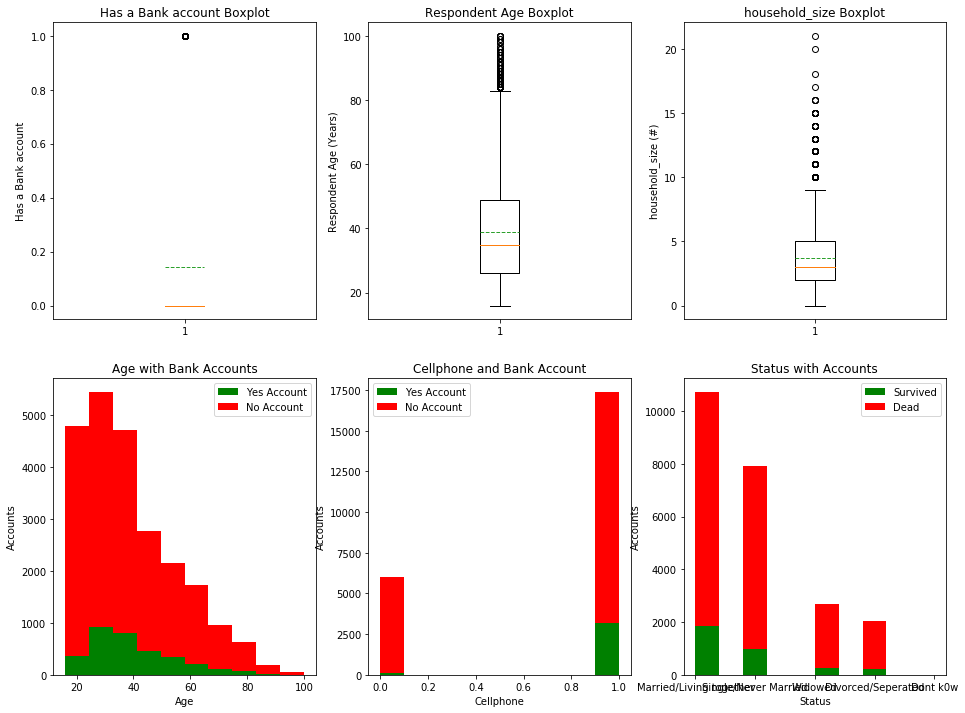

In [0]:
#graph distribution of quantitative data

plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=financial['Has a Bank account'], showmeans = True, meanline = True)
plt.title('Has a Bank account Boxplot')
plt.ylabel('Has a Bank account')

plt.subplot(232)
plt.boxplot(financial['Respondent Age'], showmeans = True, meanline = True)
plt.title('Respondent Age Boxplot')
plt.ylabel('Respondent Age (Years)')

plt.subplot(233)
plt.boxplot(financial['household_size'], showmeans = True, meanline = True)
plt.title('household_size Boxplot')
plt.ylabel('household_size (#)')

plt.subplot(234)
plt.hist(x = [financial[financial['Has a Bank account']==1]['Respondent Age'], financial[financial['Has a Bank account']==0]['Respondent Age']], 
         stacked=True, color = ['g','r'],label = ['Yes Account','No Account'])                                                                                                         
plt.title('Age with Bank Accounts')
plt.xlabel('Age')
plt.ylabel('Accounts')
plt.legend()

plt.subplot(235)
plt.hist(x = [financial[financial['Has a Bank account']==1]['Cell Phone Access'], financial[financial['Has a Bank account']==0]['Cell Phone Access']], 
         stacked=True, color = ['g','r'],label = ['Yes Account','No Account'])
plt.title('Cellphone and Bank Account')
plt.xlabel('Cellphone')
plt.ylabel('Accounts')
plt.legend()

plt.subplot(236)
plt.hist(x = [financial[financial['Has a Bank account']==1]['marital_status'], financial[financial['Has a Bank account']==0]['marital_status']], 
         stacked=True, color = ['g','r'],label = ['Yes Account','No Account'])
plt.title('Status with Accounts')
plt.xlabel('Status')
plt.ylabel('Accounts')
plt.legend()

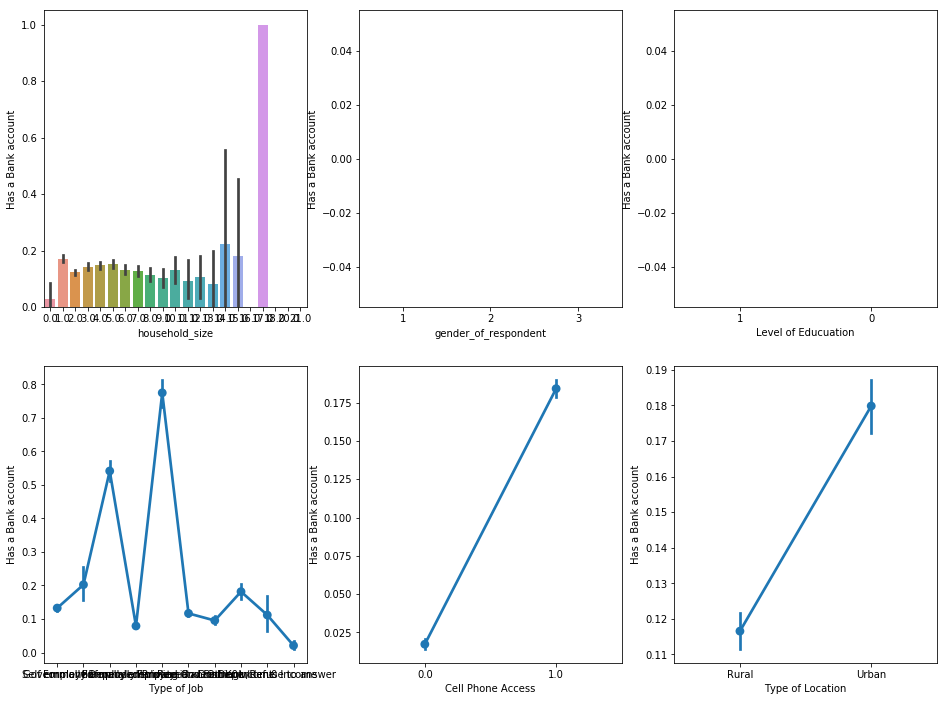

In [0]:
#we will use seaborn graphics for multi-variable comparison:

#graph individual features by Has Bank Account
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'household_size', y = 'Has a Bank account', data=financial, ax = saxis[0,0])
sns.barplot(x = 'gender_of_respondent', y = 'Has a Bank account', order=[1,2,3], data=financial, ax = saxis[0,1])
sns.barplot(x = 'Level of Educuation', y = 'Has a Bank account', order=[1,0], data=financial, ax = saxis[0,2])

sns.pointplot(x = 'Type of Job', y = 'Has a Bank account',  data=financial, ax = saxis[1,0])
sns.pointplot(x = 'Cell Phone Access', y = 'Has a Bank account',  data=financial, ax = saxis[1,1])
sns.pointplot(x = 'Type of Location', y = 'Has a Bank account', data=financial, ax = saxis[1,2])

Text(0.5, 1.0, 'gender_of_respondent vs Type of Job Comparison')

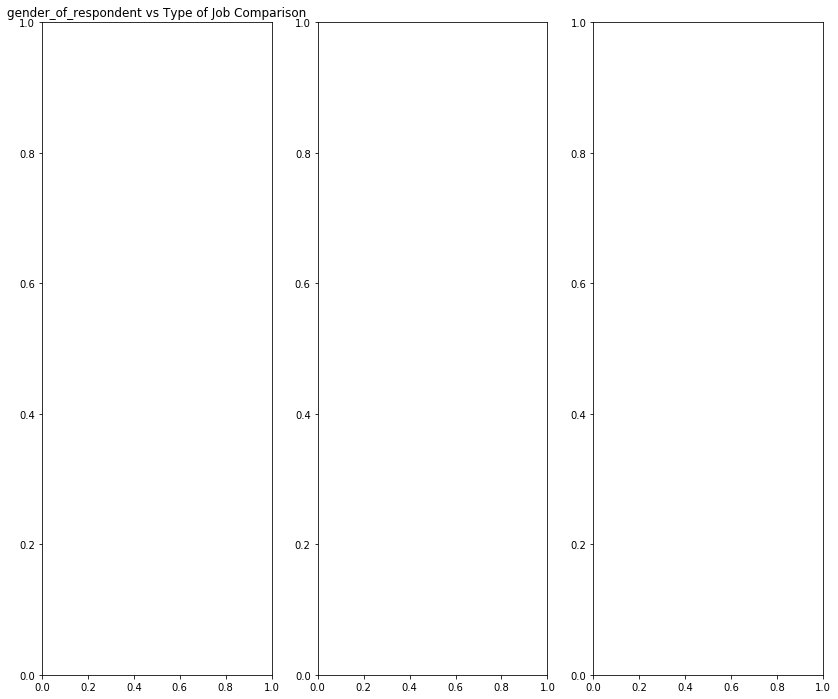

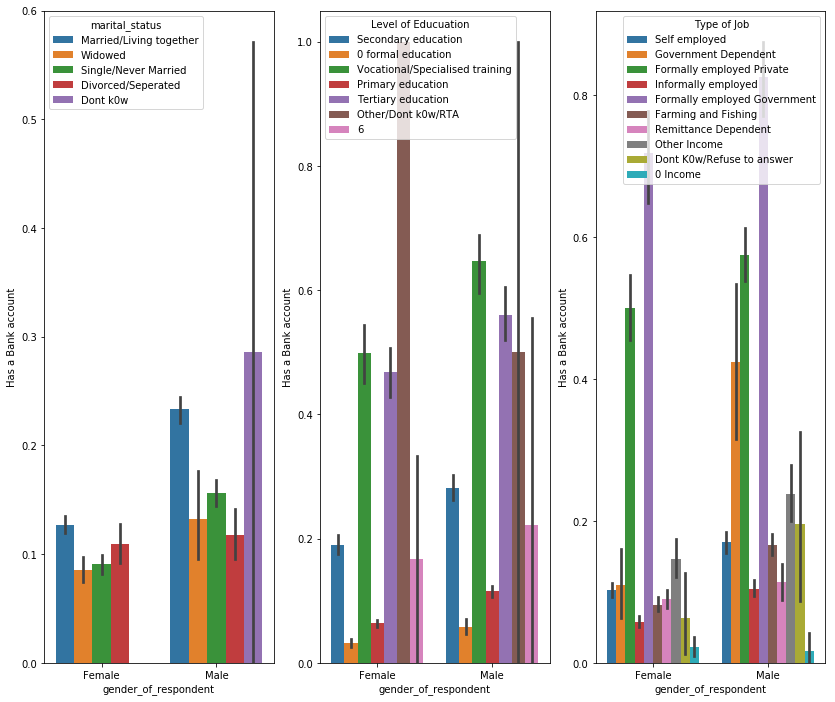

In [0]:
#graph distribution of qualitative data: Gender
#we know gender mattered in survival, now let's compare gender and a 2nd feature

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'gender_of_respondent', y = 'Has a Bank account', hue = 'marital_status', data=financial, ax = qaxis[0])
axis1.set_title('gender_of_respondent vs marital_status Comparison')

sns.barplot(x = 'gender_of_respondent', y = 'Has a Bank account', hue = 'Level of Educuation', data=financial, ax  = qaxis[1])
axis1.set_title('Sex vs Level of Educuation Comparison')

sns.barplot(x = 'gender_of_respondent', y = 'Has a Bank account', hue = 'Type of Job', data=financial, ax  = qaxis[2])
axis1.set_title('gender_of_respondent vs Type of Job Comparison')

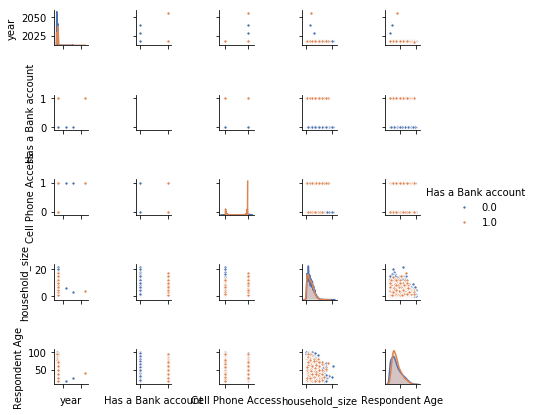

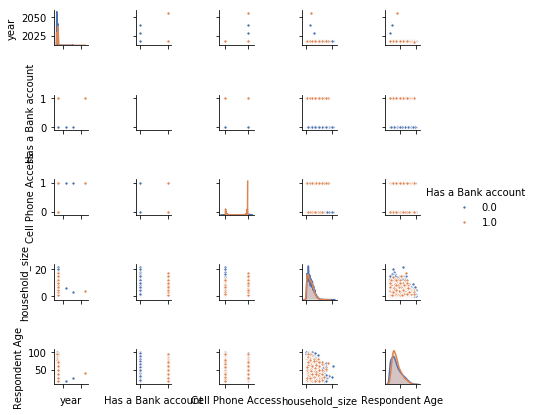

In [0]:
#pair plots of entire dataset

pp = sns.pairplot(financial, hue = 'Has a Bank account', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])#pair plots of entire dataset

pp = sns.pairplot(financial, hue = 'Has a Bank account', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

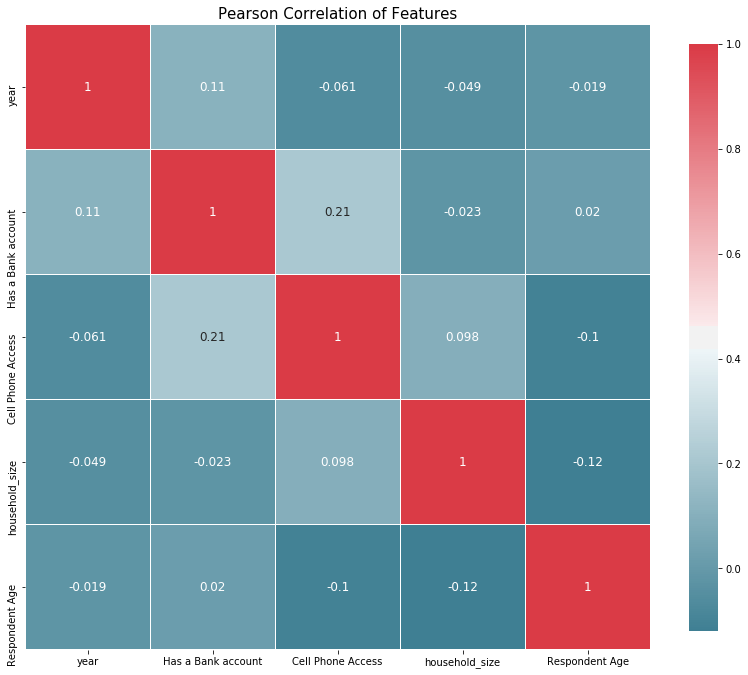

In [0]:
#correlation heatmap of dataset

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(financial)

**PREDICTING IF ALL WILL HAVE A BANK ACCOUNT**

In [0]:
#coin flip model with random 1/Has a Bank account 0/Has no Bank account

#iterate over dataFrame rows as (index, Series) pairs: 
for index, row in financial.iterrows(): 
  
    #random number generator: https://docs.python.org/2/library/random.html
    if random.random() > .5:     # Random float x, 0.0 <= x < 1.0    
        financial.set_value(index, 'Random_Predict', 1) #predict Has a Bank account/1
    else: 
        financial.set_value(index, 'Random_Predict', 0) #predict Has no Bank account/0
    

#score random guess of Has a Bank account. Use shortcut 1 = Right Guess and 0 = Wrong Guess
#the mean of the column will then equal the accuracy

financial['Random_Score'] = 0 #assume prediction wrong
financial.loc[(financial['Has a Bank account'] == financial['Random_Predict']), 'Random_Score'] = 1 #set to 1 for correct prediction
print('Coin Flip Model Accuracy: {:.2f}%'.format(financial['Random_Score'].mean()*100))

#we can also use scikit's accuracy_score function 

#print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(financial['Has a Bank account'], financial['Random_Predict'])*100))

Coin Flip Model Accuracy: 49.75%


**PEARSON'S CHI-SQUARED TEST**



In [0]:
import scipy
import math
from scipy.stats import chi2_contingency

**The Null and Alternate Hypotheses**

H0:There is no statistically significant relationship between Has a Bank account and Gender of Respondent

H1:There is a statistically significant relationship between Has a Bank account and  Gender of Respondent

In [0]:

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table for Respondent age 
table = [	[10, 20, 30],
			[6,  9,  17]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
  
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[10, 20, 30], [6, 9, 17]]
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)
significance=0.050, p=0.873
Independent (fail to reject H0)


**Constructing the Contingency Table**

In [0]:
cols = ['Has a Bank account', 'Type of Location', 'Cell Phone Access', 'household_size', 'Respondent Age', 
        'gender_of_respondent','The relathip with head','marital_status', 'Level of Educuation','Type of Job']
        

financial = pd.read_csv('/content/Financial Dataset - 1.csv', names=cols)

#Create a column for Has Bank categories.
def process_accounts(df):
    cut_points = [0,9,19,29,39,49,1000]
    label_names = ["0-9","10-19","20-29","30-39","40-49","50+"]
    df["Has_bank_categories"] = pd.cut(df["Has a Bank account"],
                                             cut_points,labels=label_names)
    return df

financial = process_accounts(financial)
account_and_age = financial[['Respondent Age', 'Has_bank_categories']]
account_and_age.head()

In [0]:
#The next step is to format the data into a frequency count table.

contingency_table = pd.crosstab(
    education_and_gender['gender_of_respondent'],
    education_and_gender['Has a Bank account'],
    margins = True
)
contingency_table

**Visualizing the Contingency Table with a Stacked Bar Chart**

In [0]:
#Assigns the frequency values
malecount = contingency_table.iloc[0][0:6].values
femalecount = contingency_table.iloc[1][0:6].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-9","10-19","20-29","30-39","40-49","50+"]
p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Male', 'Female'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()

**The Chi-Squared Test for Independence - Calculation with Numpy**

In [0]:
f_obs = np.append(contingency_table.iloc[0][0:6].values, contingency_table.iloc[1][0:6].values)
f_obs

In [0]:
row_sums = contingency_table.iloc[0:2,6].values
row_sums

In [0]:
col_sums = contingency_table.iloc[2,0:6].values
col_sums

In [0]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

In [0]:
#Now that we have all our observed and expected values, we can just plug everything into the Chi-squared test formula.

chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

**Degrees of Freedom**

In [0]:
#we would have to calculate the degrees of freedom before we can determine the p-value.
dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

The cut off for a p-value of 0.05 was 11.070. 
Our X2 statistic was so large that the p-value is approximately zero.
So we have evidence against the null hypothesis.

**The Chi-Squared Test for Independence - Using Scipy**

In [0]:
f_obs = np.array([contingency_table.iloc[0][0:6].values,
                  contingency_table.iloc[1][0:6].values])
f_obs

In [0]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

The results were exactly the same as our calculations with Numpy. 
The X2 = ~2287, p-value = ~0 and degrees of freedom = 5.

**Conclusions**

With a p-value < 0.05 , we can reject the null hypothesis.
There is definitely some sort of relationship between Gender and Has bank Account column.
We don't know what this relationship is, but we do know that these two variables are not independent of each other.